# Test cobalt package for balanced dgp

In [1]:
library(ggplot2)
library(gridExtra)

library(cobalt)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
 cobalt (Version 4.5.5, Build Date: 2024-04-02)



## Data

In [2]:
# load data from csv
dgp_name <- "balanced"

df_train <- read.csv(paste0("../dgps/data/", dgp_name, "_train.csv"))
df_test <- read.csv(paste0("../dgps/data/", dgp_name, "_test.csv"))

print(paste0("percentage of treated in train set: ", mean(df_train$D)))
print(paste0("percentage of treated in test set: ", mean(df_test$D)))

head(df_train)

[1] "percentage of treated in train set: 0.436"
[1] "percentage of treated in test set: 0.458"


,X1,X2,X3,D,Y,m_oracle,m_hat,m_calibrated,m_oracle_ate_weights,m_oracle_att_weights,m_hat_ate_weights,m_hat_att_weights,m_calibrated_ate_weights,m_calibrated_att_weights
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3840654,0.7184539,1,1,6.088134,0.63406064,0.67951178,0.76237624,1.577136,1.00000000,1.471645,1.00000000,1.311688,1.0000000
2,-0.2191005,0.2475598,1,0,3.736979,0.45369288,0.40707344,0.42857143,1.830472,0.83047220,1.686550,0.68654952,1.750000,0.7500000
3,-1.5255252,0.6590454,0,0,-0.439215,0.02389046,0.01680282,0.01052632,1.024475,0.02447518,1.017090,0.01708998,1.010638,0.0106383
4,0.6408429,0.1549253,0,1,5.657675,0.75524055,0.70557199,0.76237624,1.324081,1.00000000,1.417290,1.00000000,1.311688,1.0000000
5,0.5629692,0.4830397,1,1,6.209506,0.75821146,0.77531998,0.77272727,1.318893,1.00000000,1.289790,1.00000000,1.294118,1.0000000
6,1.8767958,0.4276013,1,1,8.322237,0.97866813,0.98424414,1.00000000,1.021797,1.00000000,1.016008,1.00000000,1.000000,1.0000000


## ATE

### Balance Tables

In [3]:
formula <- as.formula("D ~ X1 + X2 + X3")
sd_denom = "weighted"

In [4]:
bal_table_train <- bal.tab(
    x=formula,
    treat="D",
    data=df_train,
    weights="m_oracle_ate_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_test <- bal.tab(
    x=formula,
    treat="D",
    data=df_test,
    weights="m_oracle_ate_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_train
bal_table_test

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.3397   0.2874
X2 Contin. -0.0048   0.0339
X3  Binary  0.0997   0.0212
Y  Contin.  1.9824   1.1904

Effective sample sizes
           Control Treated
Unadjusted  564.    436.  
Adjusted    262.93  195.43

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.3117   0.2435
X2 Contin. -0.1670  -0.0235
X3  Binary  0.0466   0.0234
Y  Contin.  2.0080   1.2489

Effective sample sizes
           Control Treated
Unadjusted  542.    458.  
Adjusted    305.86  165.96

### Love Plots

In [5]:

ate_plots_train <- list()
ate_plots_test <- list()

for (i in seq_along(c("m_oracle_ate_weights", "m_hat_ate_weights", "m_calibrated_ate_weights"))) {

    weights <- c("m_oracle_ate_weights", "m_hat_ate_weights", "m_calibrated_ate_weights")[i]

    bal_table_train <- bal.tab(
        x=formula,
        treat="D",
        data=df_train,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    bal_table_test <- bal.tab(
        x=formula,
        treat="D",
        data=df_test,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    print(bal_table_train)
    print(bal_table_test)

    p_train <- love.plot(bal_table_train, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Train - ", weights))
    
    p_test <- love.plot(bal_table_test, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Test - ", weights))

    ate_plots_train[[i]] <- p_train
    ate_plots_test[[i]] <- p_test
}

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.3397   0.2874
X2 Contin. -0.0048   0.0339
X3  Binary  0.0997   0.0212
Y  Contin.  1.9824   1.1904

Effective sample sizes
           Control Treated
Unadjusted  564.    436.  
Adjusted    262.93  195.43
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.3117   0.2435
X2 Contin. -0.1670  -0.0235
X3  Binary  0.0466   0.0234
Y  Contin.  2.0080   1.2489

Effective sample sizes
           Control Treated
Unadjusted  542.    458.  
Adjusted    305.86  165.96
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.2897   0.0669
X2 Contin. -0.0047  -0.2041
X3  Binary  0.0997  -0.0265
Y  Contin.  2.0241   1.1073

Effective sample sizes
           Control Treated
Unadjusted  564.    436.  
Adjusted    207.78  101.23
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.2871   0.0871
X2 Contin. -0.1679  -0.1717
X3  Binary  0.0466   0.0113
Y  Contin.  2.0421   1.2081

Effective sample sizes
           Control Treated
Unadju

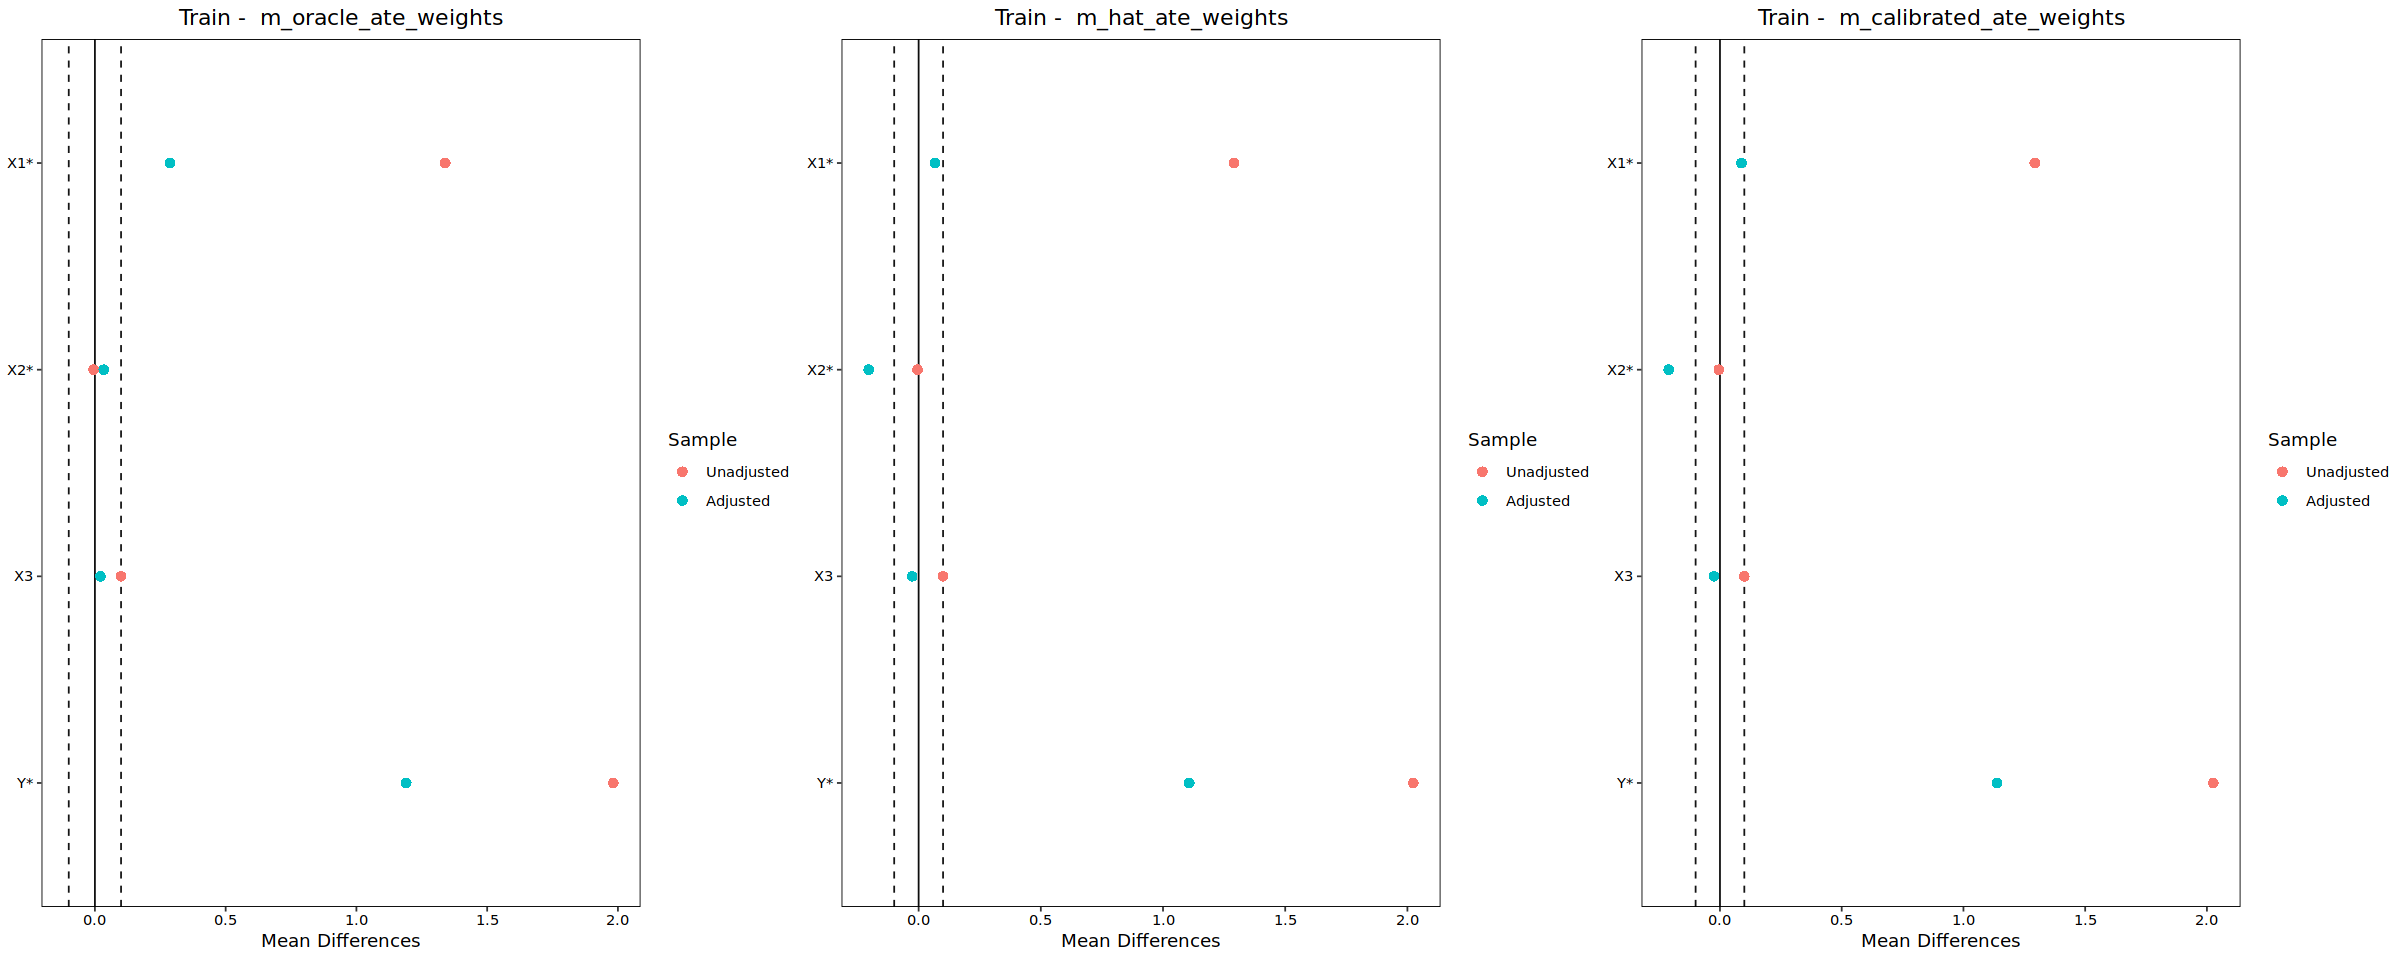

In [6]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = ate_plots_train, nrow = 1, ncol = 3)

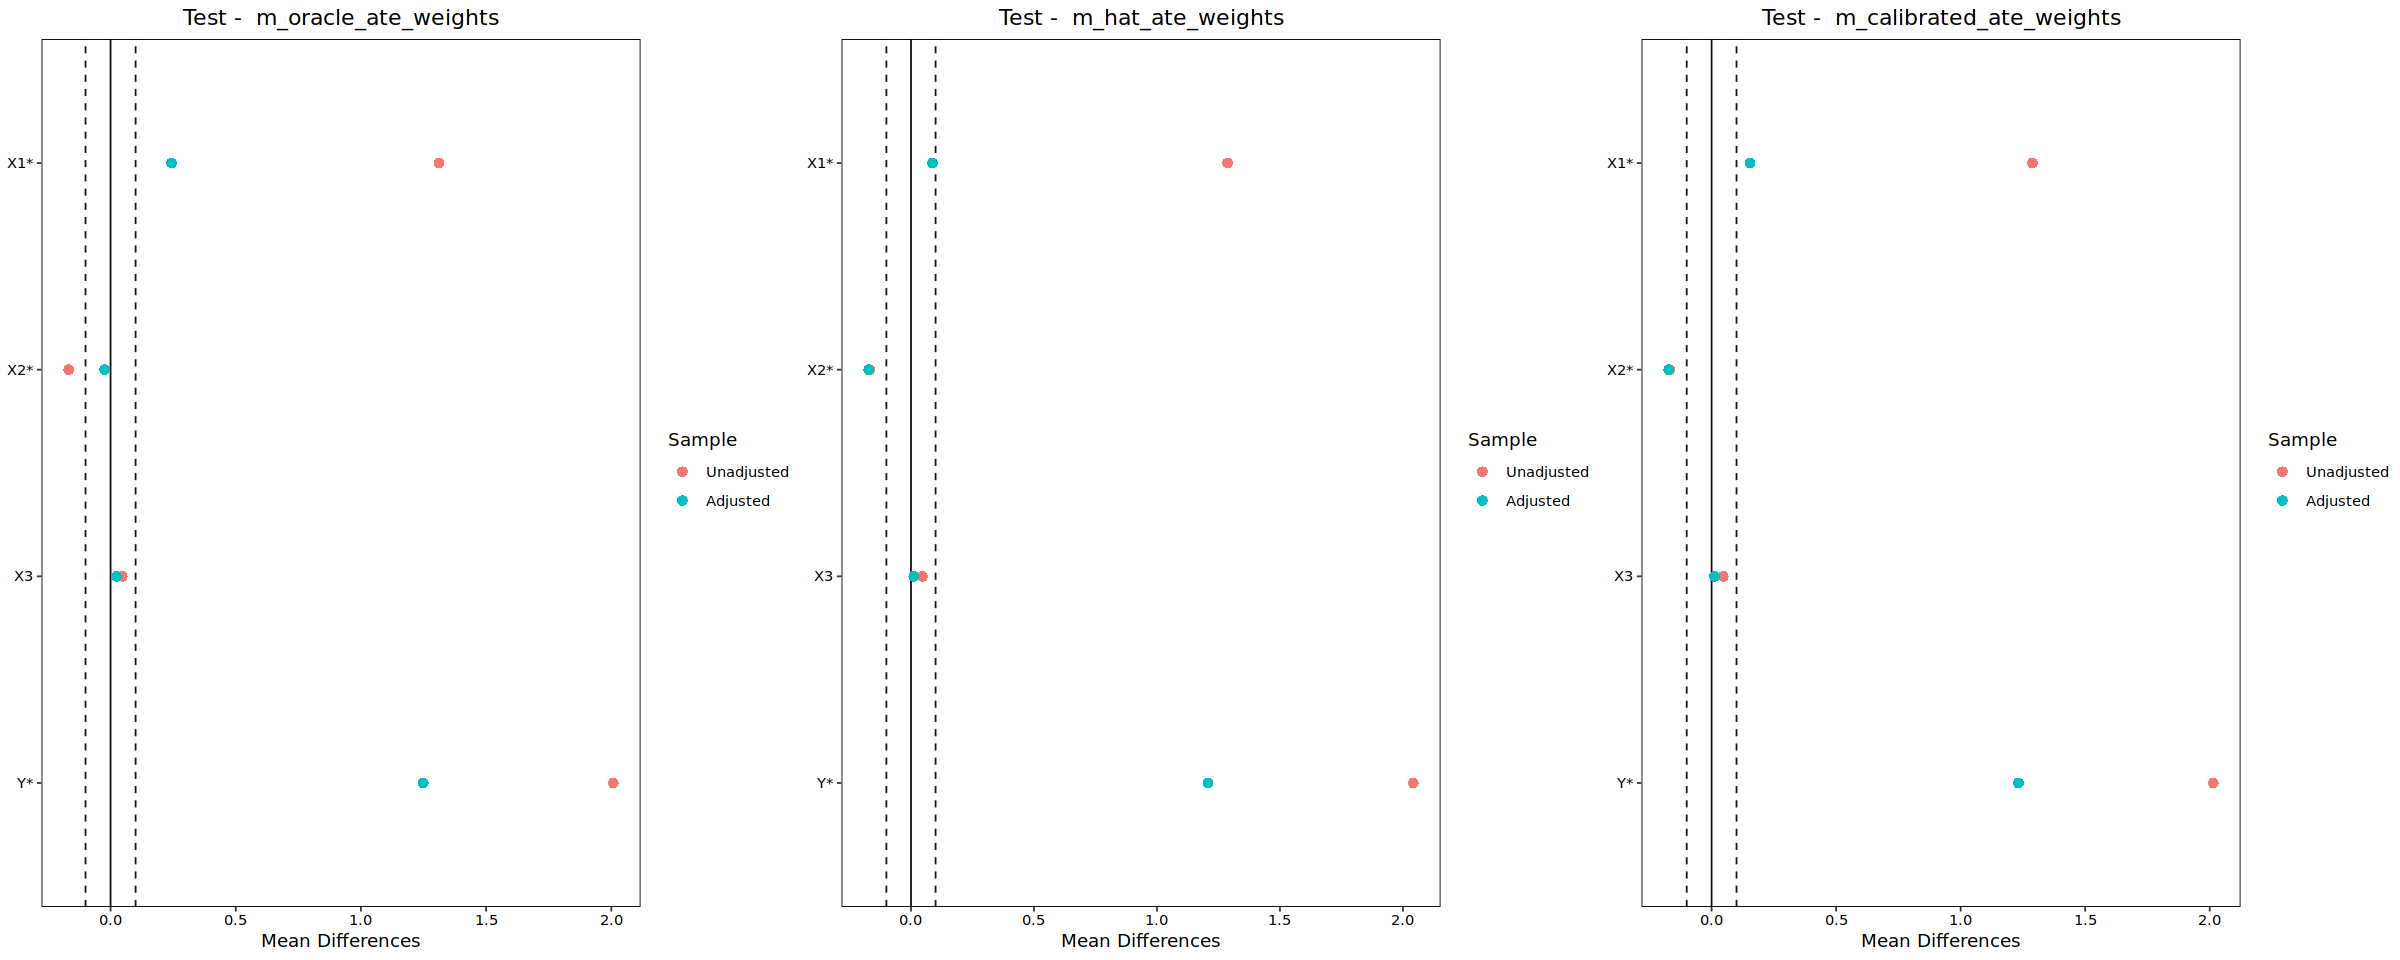

In [7]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = ate_plots_test, nrow = 1, ncol = 3)

## ATT

### Balance Tables

In [8]:
formula <- as.formula("D ~ X1 + X2 + X3")
sd_denom = "weighted"

In [9]:
bal_table_train <- bal.tab(
    x=formula,
    treat="D",
    data=df_train,
    weights="m_oracle_att_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_test <- bal.tab(
    x=formula,
    treat="D",
    data=df_test,
    weights="m_oracle_att_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_train
bal_table_test

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.6822   0.1502
X2 Contin. -0.0049   0.0787
X3  Binary  0.0997   0.0277
Y  Contin.  2.3248   1.2449

Effective sample sizes
           Control Treated
Unadjusted   564.      436
Adjusted      80.8     436

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5604   0.2996
X2 Contin. -0.1646  -0.1387
X3  Binary  0.0466   0.0612
Y  Contin.  2.1892   1.4142

Effective sample sizes
           Control Treated
Unadjusted   542.      458
Adjusted     106.3     458

### Love Plots

In [10]:
att_plots_train <- list()
att_plots_test <- list()

for (i in seq_along(c("m_oracle_att_weights", "m_hat_att_weights", "m_calibrated_att_weights"))) {

    weights <- c("m_oracle_att_weights", "m_hat_att_weights", "m_calibrated_att_weights")[i]

    bal_table_train <- bal.tab(
        x=formula,
        treat="D",
        data=df_train,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    bal_table_test <- bal.tab(
        x=formula,
        treat="D",
        data=df_test,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    print(bal_table_train)
    print(bal_table_test)

    p_train <- love.plot(bal_table_train, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Train - ", weights))
    
    p_test <- love.plot(bal_table_test, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Test - ", weights))

    att_plots_train[[i]] <- p_train
    att_plots_test[[i]] <- p_test
}

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.6822   0.1502
X2 Contin. -0.0049   0.0787
X3  Binary  0.0997   0.0277
Y  Contin.  2.3248   1.2449

Effective sample sizes
           Control Treated
Unadjusted   564.      436
Adjusted      80.8     436
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5604   0.2996
X2 Contin. -0.1646  -0.1387
X3  Binary  0.0466   0.0612
Y  Contin.  2.1892   1.4142

Effective sample sizes
           Control Treated
Unadjusted   542.      458
Adjusted     106.3     458
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.7017  -0.0102
X2 Contin. -0.0050  -0.1281
X3  Binary  0.0997  -0.0216
Y  Contin.  2.3820   1.2059

Effective sample sizes
           Control Treated
Unadjusted  564.       436
Adjusted     57.51     436
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5659   0.1577
X2 Contin. -0.1644  -0.3386
X3  Binary  0.0466   0.0676
Y  Contin.  2.2121   1.4129

Effective sample sizes
           Control Treated
Unadju

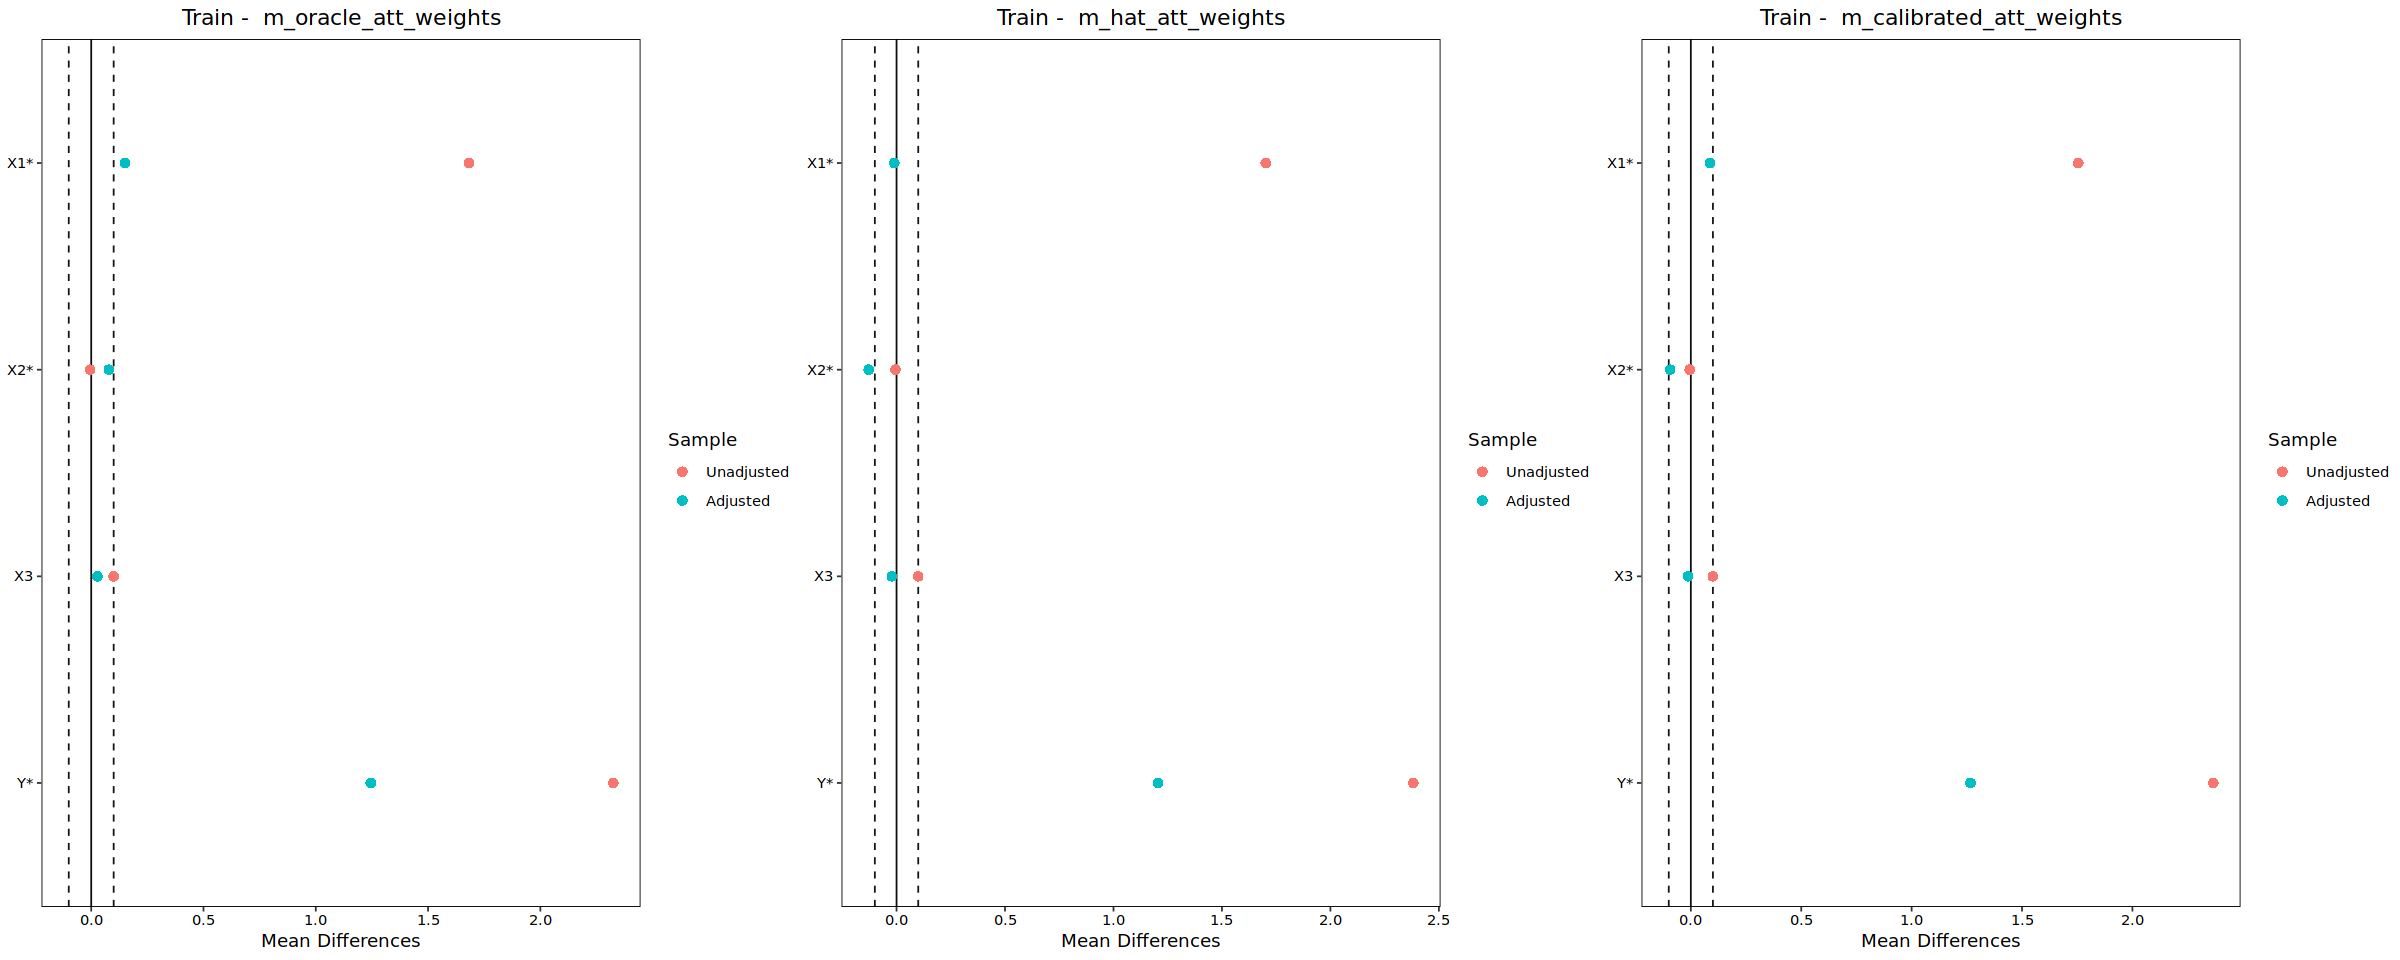

In [11]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = att_plots_train, nrow = 1, ncol = 3)